In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 2

In [2]:
df1 = pd.read_csv('feature_output.csv')
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.681,0.594,7,-7.028,1,0.2820,0.16500,0.000003,0.134,0.535,186.054,audio_features,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/5aAx...,230453,4
1,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.111,0.661,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
2,0.476,0.718,8,-5.309,1,0.0576,0.07840,0.000010,0.122,0.142,199.864,audio_features,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m,https://api.spotify.com/v1/tracks/4pdPtRcBmOSQ...,https://api.spotify.com/v1/audio-analysis/4pdP...,205947,4
3,0.720,0.763,9,-4.068,0,0.0523,0.40600,0.000000,0.180,0.742,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4
4,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,audio_features,1xznGGDReH1oQq0xzbwXa3,spotify:track:1xznGGDReH1oQq0xzbwXa3,https://api.spotify.com/v1/tracks/1xznGGDReH1o...,https://api.spotify.com/v1/audio-analysis/1xzn...,173987,4


In [3]:
df2 = pd.read_csv('ranking_output.csv')
df2.head()

,Position,Track Name,Artist,Streams,URL,Country,Date
0,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,global,2017-01-01
1,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,global,2017-01-01
2,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,global,2017-01-01
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,global,2017-01-01
4,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,global,2017-01-01


In [4]:
cc = pd.read_csv('country-codes.csv')
cc.head()

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925,TW,,TW,...,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1,AF,AF,AF,...,Southern Asia,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2
2,ALB,355,ALB,aa,Yes,8.0,3,AL,AB,AL,...,Southern Europe,Албания,World,Tirana,EU,.al,"sq,el",783754.0,Albania,B3
3,ALG,213,DZA,ae,Yes,12.0,4,AG,AL,DZ,...,Northern Africa,Алжир,World,Algiers,AF,.dz,ar-DZ,2589581.0,Algeria,B4
4,ASA,1-684,ASM,as,Territory of US,16.0,5,AQ,,AS,...,Polynesia,Американское Самоа,World,Pago Pago,OC,.as,"en-AS,sm,to",5880801.0,American Samoa,B5


In [5]:
df2.Country.unique()

array(['global', 'us', 'gb', 'ar', 'at', 'au', 'be', 'bg', 'bo', 'br',
       'ca', 'ch', 'cl', 'co', 'cr', 'cz', 'de', 'dk', 'do', 'ec', 'ee',
       'es', 'fi', 'fr', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'il',
       'in', 'is', 'it', 'jp', 'lt', 'lu', 'lv', 'mt', 'mx', 'my', 'ni',
       'nl', 'no', 'nz', 'pa', 'pe', 'ph', 'pl', 'pt', 'py', 'ro', 'se',
       'sg', 'sk', 'sv', 'th', 'tr', 'tw', 'uy', 'vn', 'za'], dtype=object)

In [6]:
cc['cc'] = cc['ISO3166-1-Alpha-2'].str.lower()

cc['country'] = cc['UNTERM English Short'].apply(lambda text: str(text).split(' (')[0])
cc['country'].replace('United States of America', 'United States', inplace=True)
cc['country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)

cc.loc[cc['ISO3166-1-Alpha-2'] == 'TW', 'country'] = 'Taiwan'
cc.loc[cc['ISO3166-1-Alpha-2'] == 'HK', 'country'] = 'Hong Kong'

In [7]:
df3 = df2.merge(cc[['cc', 'Continent', 'Region Name', 'Sub-region Name', 'country']], how='left', left_on='Country', right_on='cc')

In [8]:
df3['country'].unique()

array([nan, 'United States', 'United Kingdom', 'Argentina', 'Austria',
       'Australia', 'Belgium', 'Bulgaria', 'Bolivia', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Estonia',
       'Spain', 'Finland', 'France', 'Greece', 'Guatemala', 'Hong Kong',
       'Honduras', 'Hungary', 'Indonesia', 'Ireland', 'Israel', 'India',
       'Iceland', 'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Latvia',
       'Malta', 'Mexico', 'Malaysia', 'Nicaragua', 'Netherlands',
       'Norway', 'New Zealand', 'Panama', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Paraguay', 'Romania', 'Sweden', 'Singapore',
       'Slovakia', 'El Salvador', 'Thailand', 'Turkey', 'Taiwan',
       'Uruguay', 'Viet Nam', 'South Africa'], dtype=object)

In [9]:
df3[df3['cc'].isnull()]['Country'].unique()

array(['global'], dtype=object)

In [10]:
df3['country'] = df3['country'].fillna('World')

In [11]:
df3['track_id'] = df3['URL'].apply(lambda text: re.search(r"([^\/]+$)", str(text)).group())

In [12]:
df3.head()

,Position,Track Name,Artist,Streams,URL,Country,Date,cc,Continent,Region Name,Sub-region Name,country,track_id
0,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,global,2017-01-01,NaN,NaN,NaN,NaN,World,5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,global,2017-01-01,NaN,NaN,NaN,NaN,World,7BKLCZ1jbUBVqRi2FVlTVw
2,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,global,2017-01-01,NaN,NaN,NaN,NaN,World,4pdPtRcBmOSQDlJ3Fk945m
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,global,2017-01-01,NaN,NaN,NaN,NaN,World,5knuzwU65gJK7IF5yJsuaW
4,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,global,2017-01-01,NaN,NaN,NaN,NaN,World,1xznGGDReH1oQq0xzbwXa3


In [13]:
len(df3)

11805021

In [14]:
df = df3.merge(df1, how='inner', left_on='track_id', right_on='id')

In [15]:
len(df)

11804953

In [16]:
df['date'] = pd.to_datetime(df['Date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

In [17]:
df[df.groupby(['date', 'country'])['Position'].transform('count') < 50]['country'].unique()

array(['Bulgaria', 'Estonia', 'Greece', 'Iceland', 'Lithuania',
       'Luxembourg', 'Latvia', 'Malta', 'Nicaragua', 'Slovakia'],
      dtype=object)

In [18]:
df[df['country'] == 'nan']

,Position,Track Name,Artist,Streams,URL,Country,Date,cc,Continent,Region Name,...,id,uri,track_href,analysis_url,duration_ms,time_signature,date,month,day,dayofweek


In [19]:
countries_to_drop = df[df.groupby(['date', 'country'])['Position'].transform('count') < 50]['country'].unique().tolist()

In [20]:
df[df['country'] == 'World'].groupby('month')['valence'].mean()

month
1     0.492286
2     0.484556
3     0.483192
4     0.486186
5     0.497764
6     0.499311
7     0.501656
8     0.504247
9     0.502332
10    0.494994
11    0.495437
12    0.516192
Name: valence, dtype: float64

In [21]:
regions = [(df[df['Sub-region Name'] == region].groupby(['Sub-region Name'])['valence'].mean().tolist(), region) for region in df['Sub-region Name'].unique()]
regions.sort(key=lambda x: x[0], reverse=True)
regions = regions[:-1]
regions

[([0.6079815378287436], 'Latin America and the Caribbean'),
 ([0.5130620462277716], 'Southern Europe'),
 ([0.5040444348406525], 'Western Europe'),
 ([0.4977171627550875], 'Southern Asia'),
 ([0.4876470274707931], 'Northern Europe'),
 ([0.48140344589271705], 'Western Asia'),
 ([0.4799360770699443], 'Eastern Europe'),
 ([0.47771745945856386], 'Eastern Asia'),
 ([0.4768792577632774], 'Australia and New Zealand'),
 ([0.4556759324930381], 'Northern America'),
 ([0.45465222234448627], 'Sub-Saharan Africa'),
 ([0.4482537520759068], 'South-eastern Asia')]

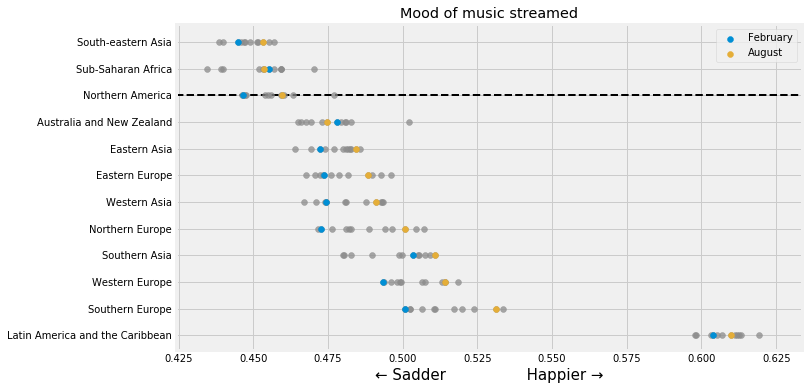

In [22]:
plt.figure(figsize=(10, 6))
for region in regions:
    region = region[1]
    data = df[df['Sub-region Name'] == region].groupby(['month', 'Sub-region Name'])['valence'].mean().tolist()
    if region == 'Northern America':
        plt.axhline(region, linestyle='--', linewidth=2, c='k')
        plt.scatter(data, [region] * len(data), c='#8b8b8b', s=35, alpha=.75, zorder=5)
        plt.scatter(data[1], region, c='#008fd5', s=35, label='February', zorder=5)
        plt.scatter(data[7], region, c='#e5ae38', s=35, label='August', zorder=5)
    else:
        if len(data) == 12:
            plt.scatter(data, [region] * len(data), c='#8b8b8b', s=35, alpha=.75)
            plt.scatter(data[1], region, c='#008fd5', s=35)
            plt.scatter(data[7], region, c='#e5ae38', s=35)
plt.title('Mood of music streamed')
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.legend()
plt.show()

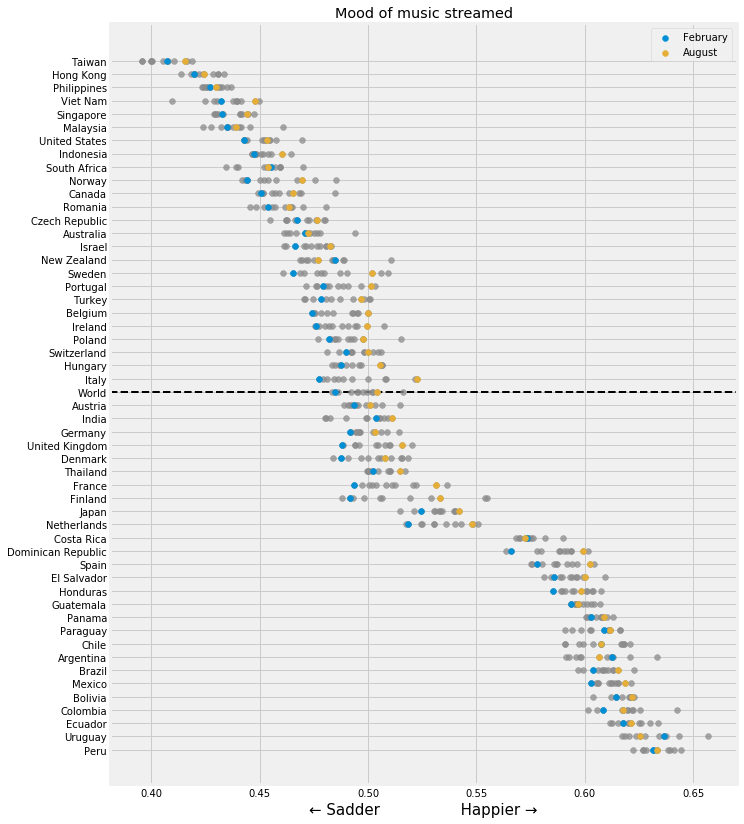

In [23]:
countries = [(df[df['country'] == country].groupby(['country'])['valence'].mean().tolist(), country) for country in df['country'].unique()]
countries.sort(key=lambda x: x[0], reverse=True)

plt.figure(figsize=(10, 14))
for country in countries:
    country = country[1]
    if country not in countries_to_drop:
        data = df[df['country'] == country].groupby(['month', 'country'])['valence'].mean().tolist()
        if country == 'World':
            plt.axhline(country, linestyle='--', linewidth=2, c='k')
            plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75, zorder=5)
            plt.scatter(data[1], country, c='#008fd5', s=35, label='February', zorder=5)
            plt.scatter(data[7], country, c='#e5ae38', s=35, label='August', zorder=5)
        else:
            if len(data) == 12:
                plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75)
                plt.scatter(data[1], country, c='#008fd5', s=35)
                plt.scatter(data[7], country, c='#e5ae38', s=35)
plt.title('Mood of music streamed')
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.legend()
plt.show()

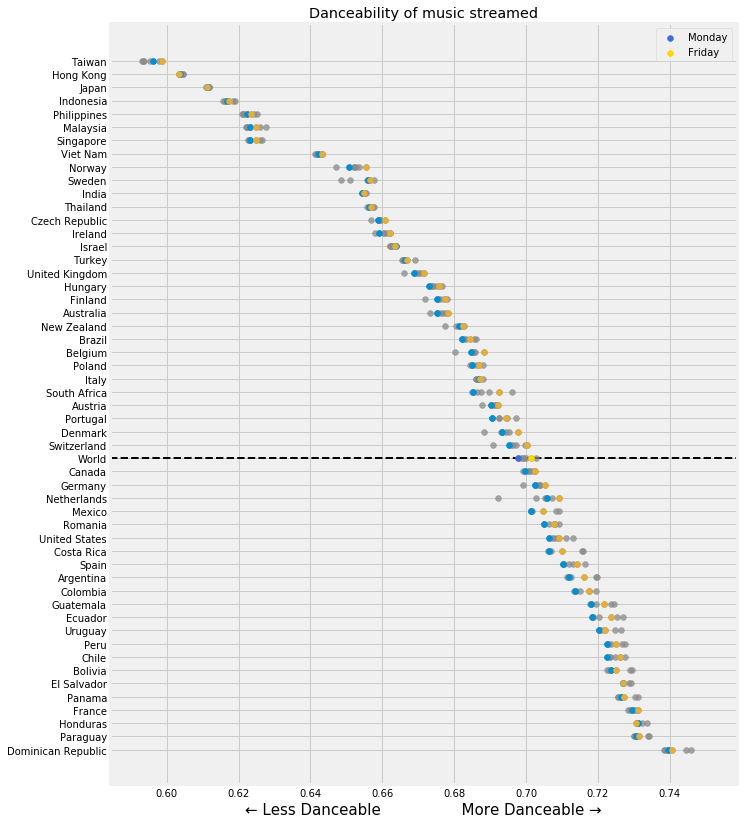

In [24]:
countries = [(df[df['country'] == country].groupby(['country'])['danceability'].mean().tolist(), country) for country in df['country'].unique()]
countries.sort(key=lambda x: x[0], reverse=True)

plt.figure(figsize=(10, 14))
for country in countries:
    country = country[1]
    if country not in countries_to_drop:
        data = df[df['country'] == country].groupby(['dayofweek', 'country'])['danceability'].mean().tolist()
        if country == 'World':
            plt.axhline(country, linestyle='--', linewidth=2, c='k')
            plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75, zorder=5)
            plt.scatter(data[0], country, c='royalblue', s=35, label='Monday', zorder=5)
            plt.scatter(data[4], country, c='gold', s=35, label='Friday', zorder=5)
        else:
            if len(data) == 7:
                plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75)
                plt.scatter(data[0], country, c='#008fd5', s=35)
                plt.scatter(data[4], country, c='#e5ae38', s=35)
plt.title('Danceability of music streamed')
plt.xlabel(u'\u2190 Less Danceable                 More Danceable \u2192', fontsize=15)
plt.legend()
plt.show()

In [25]:
df_year = df[df['country'] == 'World'].groupby(['month', 'day'], as_index=False)['valence'].mean()
df_year

,month,day,valence
0,1,1,0.525635
1,1,2,0.487375
2,1,3,0.486484
3,1,4,0.492507
4,1,5,0.492911
...,...,...,...
360,12,27,0.489886
361,12,28,0.493529
362,12,29,0.494730
363,12,30,0.493947


In [26]:
df_year.groupby('month')['valence'].mean()

month
1     0.492286
2     0.483801
3     0.483192
4     0.486185
5     0.497736
6     0.499244
7     0.501798
8     0.504102
9     0.502332
10    0.494994
11    0.495437
12    0.516192
Name: valence, dtype: float64

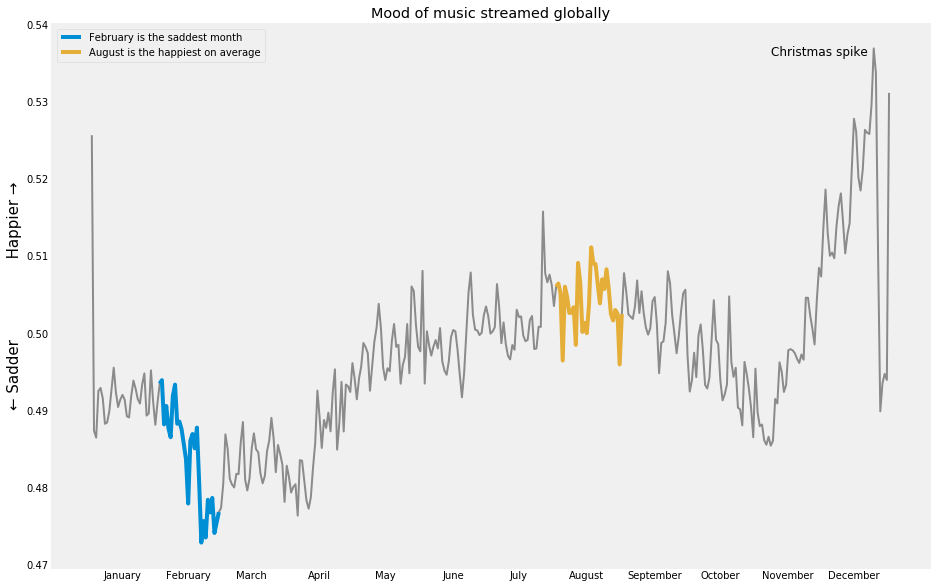

In [27]:
data = df_year['valence']

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data[df_year[df_year['month'] == 2].index], c='#008fd5', lw=4, label='February is the saddest month')
plt.plot(data[df_year[df_year['month'] == 8].index], c='#e5ae38', lw=4, label='August is the happiest on average')
# plt.axvline(x=354, c='k', lw=1, label='Christmas spike')
plt.annotate('Christmas spike', (310, .536), fontsize=12)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

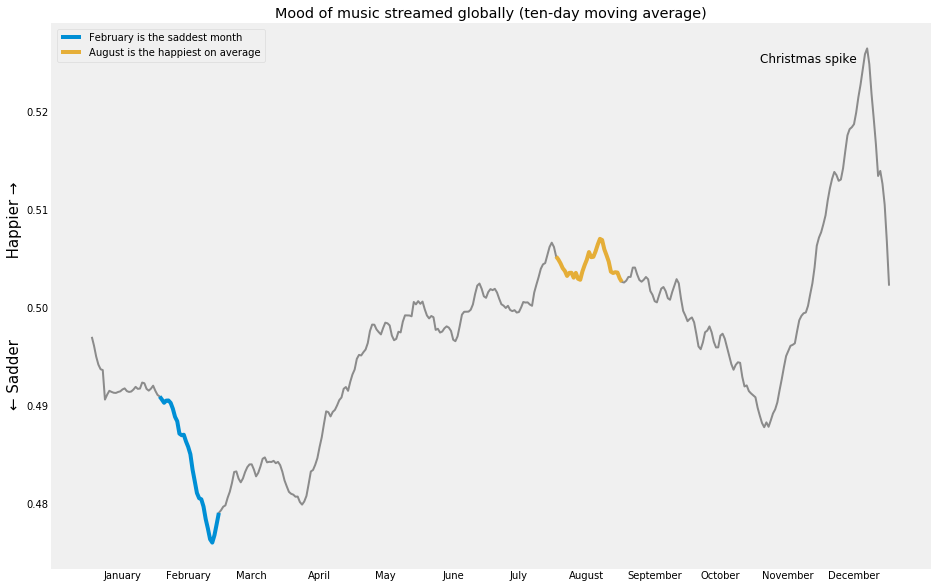

In [28]:
data = df_year['valence'].rolling(window=10, min_periods=1, center=True).mean()

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data[df_year[df_year['month'] == 2].index], c='#008fd5', lw=4, label='February is the saddest month')
plt.plot(data[df_year[df_year['month'] == 8].index], c='#e5ae38', lw=4, label='August is the happiest on average')
# plt.axvline(x=354, c='k', lw=1, label='Christmas spike')
plt.annotate('Christmas spike', (305, .525), fontsize=12)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally (ten-day moving average)')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

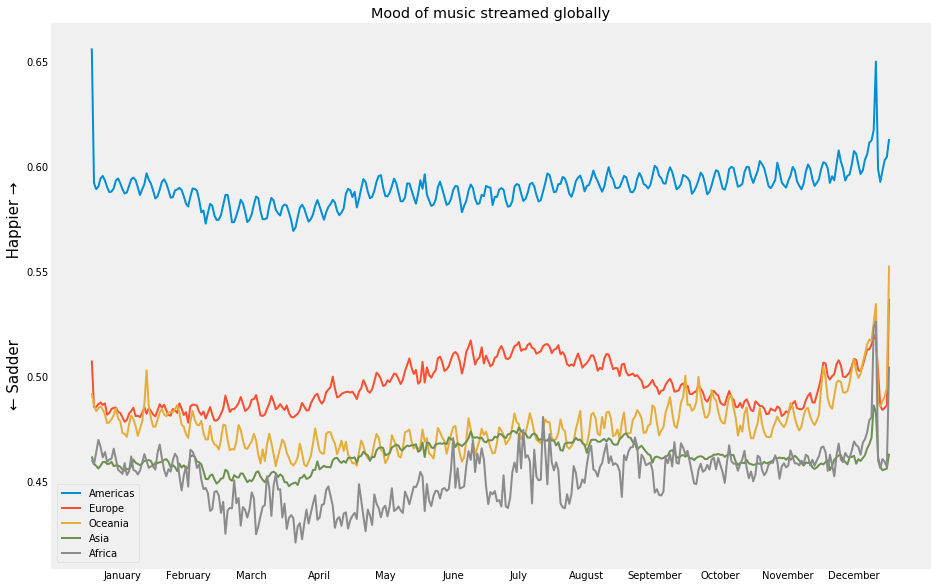

In [29]:
plt.figure(figsize=(14, 10))

for region in df['Region Name'].unique():
    if isinstance(region, str):
        df_year = df[df['Region Name'] == region].groupby(['month', 'day'], as_index=False)['valence'].mean()
        data = df_year['valence']
        plt.plot(data, label=region)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

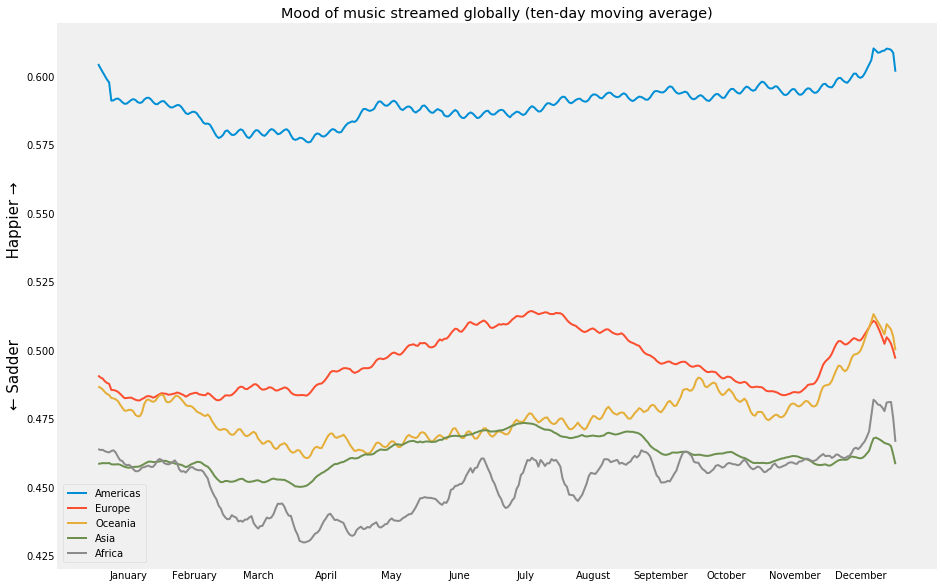

In [30]:
plt.figure(figsize=(14, 10))

for region in df['Region Name'].unique():
    if isinstance(region, str):
        df_year = df[df['Region Name'] == region].groupby(['month', 'day'], as_index=False)['valence'].mean()
        data = df_year['valence'].rolling(window=10, min_periods=1, center=True).mean()
        plt.plot(data, label=region)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally (ten-day moving average)')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

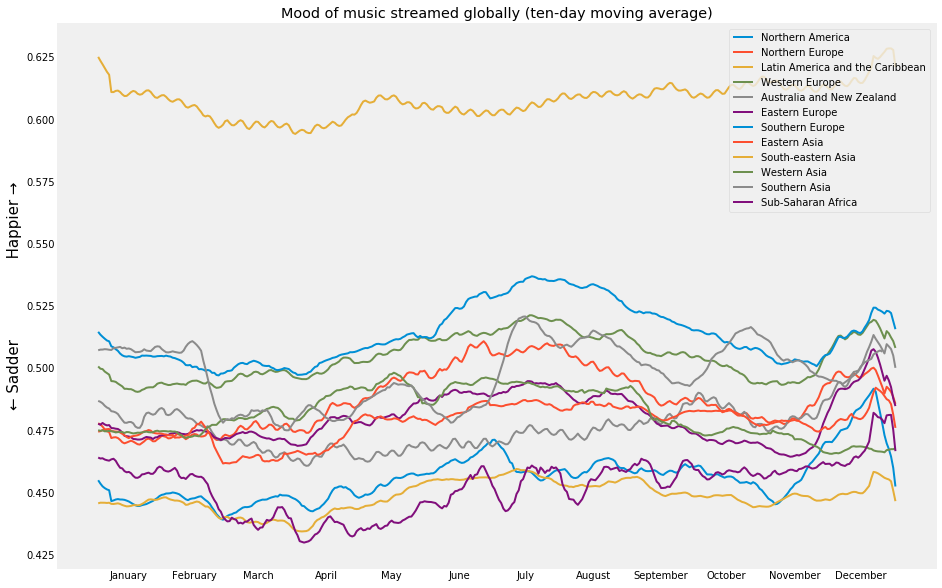

In [31]:
plt.figure(figsize=(14, 10))

for region in df['Sub-region Name'].unique():
    if isinstance(region, str):
        df_year = df[df['Sub-region Name'] == region].groupby(['month', 'day'], as_index=False)['valence'].mean()
        data = df_year['valence'].rolling(window=10, min_periods=1, center=True).mean()
        plt.plot(data, label=region)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally (ten-day moving average)')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

In [32]:
df.groupby('dayofweek')['valence'].mean()

dayofweek
0    0.515130
1    0.514970
2    0.515184
3    0.516166
4    0.518294
5    0.523277
6    0.520291
Name: valence, dtype: float64

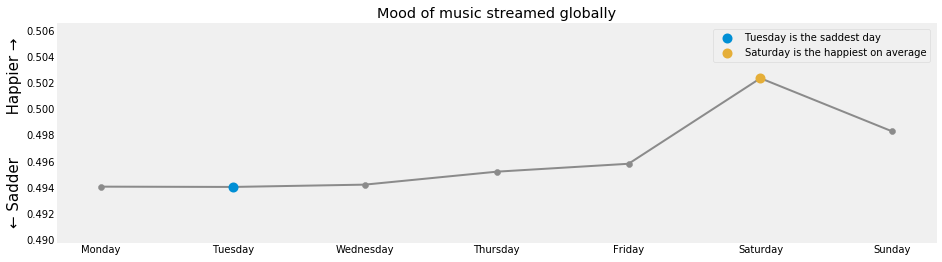

In [33]:
data = df[df['country'] == 'World'].groupby(['dayofweek'])['valence'].mean()

plt.figure(figsize=(14, 4))
plt.plot(data, c='#8b8b8b')
plt.scatter(data.index, data, c='#8b8b8b')
plt.scatter(1, data[1], c='#008fd5', lw=4, label='Tuesday is the saddest day', zorder=3)
plt.scatter(5, data[5], c='#e5ae38', lw=4, label='Saturday is the happiest on average', zorder=3)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(data.min() - .5 * (data.max() - data.min()), data.max() + .5 * (data.max() - data.min()))
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

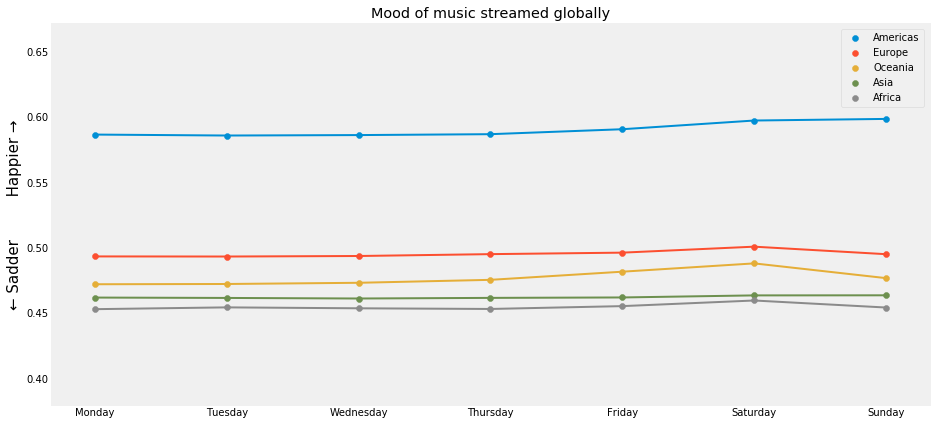

In [34]:
plt.figure(figsize=(14, 7))
for region in df['Region Name'].unique():
    if isinstance(region, str):
        data = df[df['Region Name'] == region].groupby(['dayofweek'])['valence'].mean()
        plt.plot(data)
        plt.scatter(data.index, data, label=region)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
data = df.groupby(['Region Name', 'dayofweek'])['valence'].mean()
plt.ylim(data.min() - .5 * (data.max() - data.min()), data.max() + .5 * (data.max() - data.min()))
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

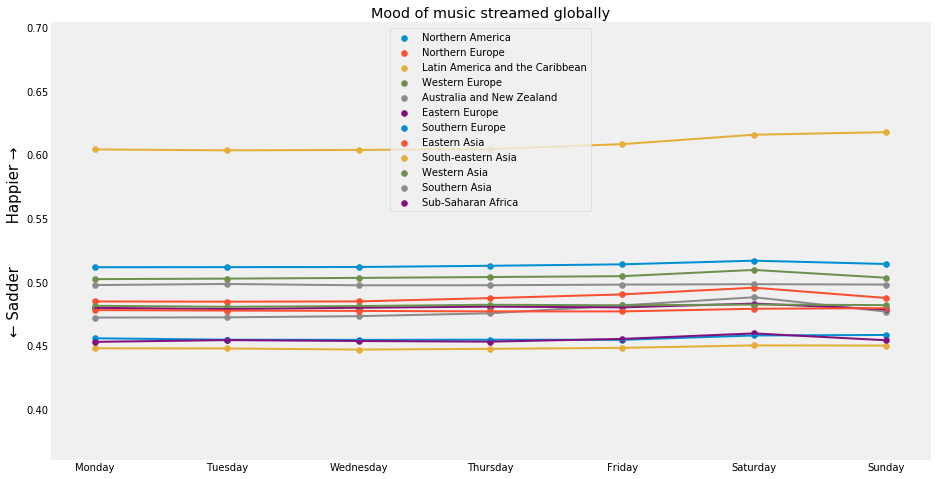

In [35]:
plt.figure(figsize=(14, 8))
for region in df['Sub-region Name'].unique():
    if isinstance(region, str):
        data = df[df['Sub-region Name'] == region].groupby(['dayofweek'])['valence'].mean()
        plt.plot(data)
        plt.scatter(data.index, data, label=region)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
data = df.groupby(['Sub-region Name', 'dayofweek'])['valence'].mean()
plt.ylim(data.min() - .5 * (data.max() - data.min()), data.max() + .5 * (data.max() - data.min()))
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

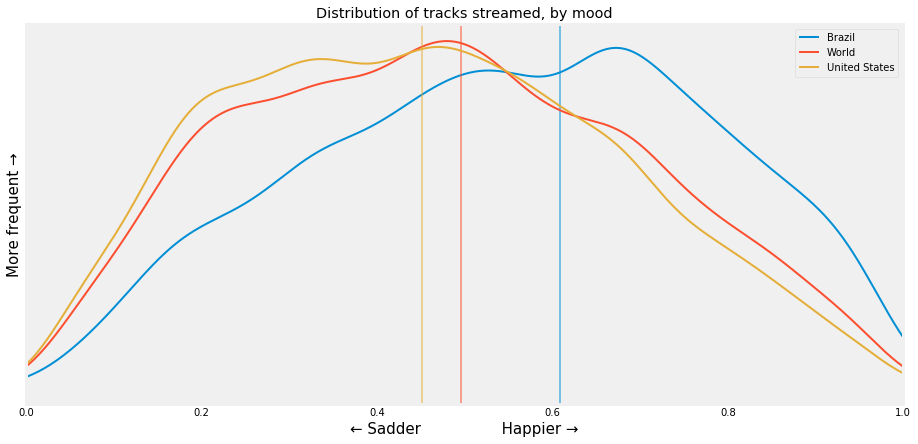

In [36]:
plt.figure(figsize=(14, 7))

df[df['country'] == 'Brazil'].groupby(['track_id'])['valence'].mean().plot.kde(label='Brazil')
plt.axvline(x=df[df['country'] == 'Brazil']['valence'].mean(), c='#008fd5', alpha=.5)

df[df['country'] == 'World'].groupby(['track_id'])['valence'].mean().plot.kde(label='World')
plt.axvline(x=df[df['country'] == 'World']['valence'].mean(), c='#fc4f30', alpha=.5)

df[df['country'] == 'United States'].groupby(['track_id'])['valence'].mean().plot.kde(label='United States')
plt.axvline(x=df[df['country'] == 'United States']['valence'].mean(), c='#e5ae38', alpha=.5)

plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.xlim(0, 1)
plt.yticks([])
plt.grid(False)
plt.title('Distribution of tracks streamed, by mood')
plt.show()

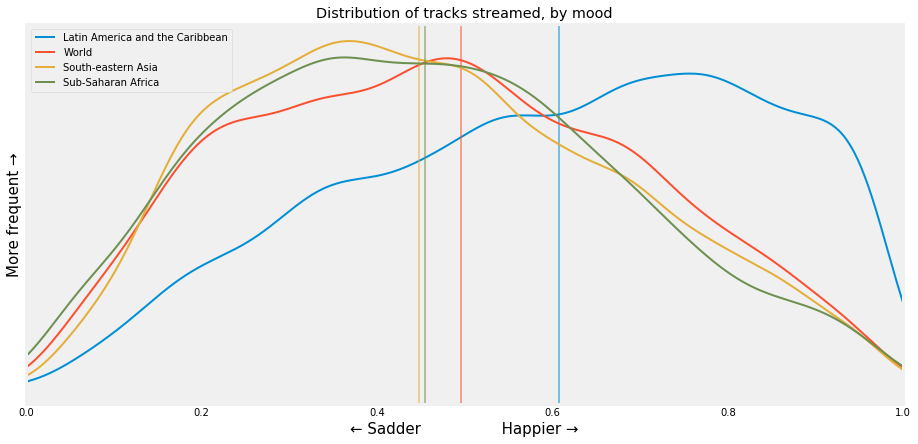

In [37]:
plt.figure(figsize=(14, 7))

df[df['Sub-region Name'] == 'Latin America and the Caribbean'].groupby(['track_id'])['valence'].mean().plot.kde(label='Latin America and the Caribbean')
plt.axvline(x=df[df['Sub-region Name'] == 'Latin America and the Caribbean']['valence'].mean(), c='#008fd5', alpha=.5)

df[df['country'] == 'World'].groupby(['track_id'])['valence'].mean().plot.kde(label='World')
plt.axvline(x=df[df['country'] == 'World']['valence'].mean(), c='#fc4f30', alpha=.5)

df[df['Sub-region Name'] == 'South-eastern Asia'].groupby(['track_id'])['valence'].mean().plot.kde(label='South-eastern Asia')
plt.axvline(x=df[df['Sub-region Name'] == 'South-eastern Asia']['valence'].mean(), c='#e5ae38', alpha=.5)

df[df['Sub-region Name'] == 'Sub-Saharan Africa'].groupby(['track_id'])['valence'].mean().plot.kde(label='Sub-Saharan Africa')
plt.axvline(x=df[df['Sub-region Name'] == 'Sub-Saharan Africa']['valence'].mean(), c='#6d904f', alpha=.5)

plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.xlim(0, 1)
plt.yticks([])
plt.grid(False)
plt.title('Distribution of tracks streamed, by mood')
plt.show()